In [ ]:
#INCEPTION V3 

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [5]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [9]:
IMAGE_SIZE = [224, 224]

train_path='/content/drive/MyDrive/data/train'
valid_path='/content/drive/MyDrive/data/val'

In [7]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [8]:
for layer in inception.layers:
    layer.trainable = False

In [28]:
folders = glob('/content/drive/MyDrive/data/train/*')

In [29]:
x = Flatten()(inception.output)

In [30]:

prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [31]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [32]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [34]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [37]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/data/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 324 images belonging to 4 classes.


In [39]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
61/61 [==============================] - 265s 4s/step - loss: 0.3289 - accuracy: 0.9626 - val_loss: 0.9101 - val_accuracy: 0.9444
Epoch 2/20
61/61 [==============================] - 267s 4s/step - loss: 0.3205 - accuracy: 0.9631 - val_loss: 0.5843 - val_accuracy: 0.9414
Epoch 3/20
61/61 [==============================] - 265s 4s/step - loss: 0.3234 - accuracy: 0.9662 - val_loss: 0.9226 - val_accuracy: 0.9259
Epoch 4/20
61/61 [==============================] - 265s 4s/step - loss: 0.3815 - accuracy: 0.9554 - val_loss: 1.1622 - val_accuracy: 0.8981
Epoch 5/20
61/61 [==============================] - 267s 4s/step - loss: 0.3566 - accuracy: 0.9657 - val_loss: 0.7335 - val_accuracy: 0.9475
Epoch 6/20
61/61 [==============================] - 269s 4s/step - loss: 0.4573 - accuracy: 0.9575 - val_loss: 0.7578 - val_accuracy: 0.9444
Epoch 7/20
61/61 [==============================] - 266s 4s/step - loss: 0.4093 - accuracy: 0.9626 - val_loss: 0.7703 - val_accuracy: 0.9414
Epoch 8/20
61

In [40]:
import matplotlib.pyplot as plt

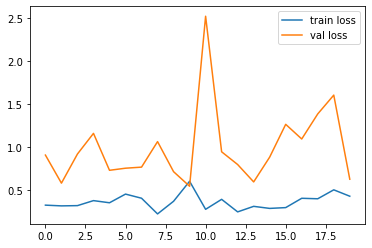

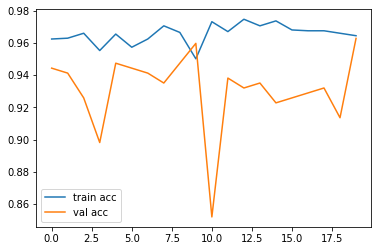

<Figure size 432x288 with 0 Axes>

In [41]:

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [43]:

from tensorflow.keras.models import load_model

model.save('model_inception.h5')